In [17]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [18]:
chipotle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [19]:
most_ordered_item = chipotle_data.groupby("item_name").quantity.sum().idxmax()
most_ordered_amount = chipotle_data.groupby("quantity").quantity.sum().max()
print(most_ordered_item)
print(most_ordered_amount)

Chicken Bowl
4355


In [20]:
chipotle_data['item_price'] = chipotle_data['item_price'].str.replace('$','').astype(float)
total_revenue = (chipotle_data['quantity'] * chipotle_data['item_price']).sum()
print(total_revenue)

39237.02


In [21]:
total_orders = chipotle_data['quantity'].sum()
print(total_orders)

4972


In [22]:
over_ten = chipotle_data[chipotle_data['item_price'] > 10]
over_ten

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75


In [23]:
chipotle_data.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

<Axes: title={'center': 'Top 5 Items Sold'}, xlabel='item_name'>

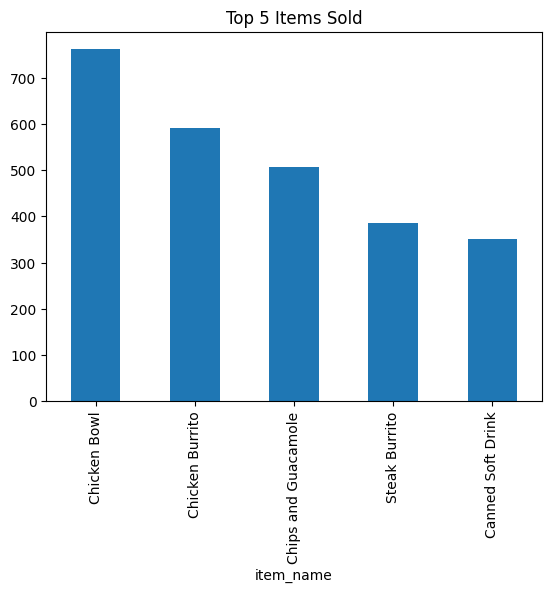

In [24]:
item_totals = chipotle_data.groupby('item_name')['quantity'].sum()
top5 = item_totals.sort_values(ascending = False).head(5)
top5
top5.plot.bar(title = "Top 5 Items Sold", x = "item_name", y = "quantity")

<Axes: title={'center': 'Top 10 Items Sold'}>

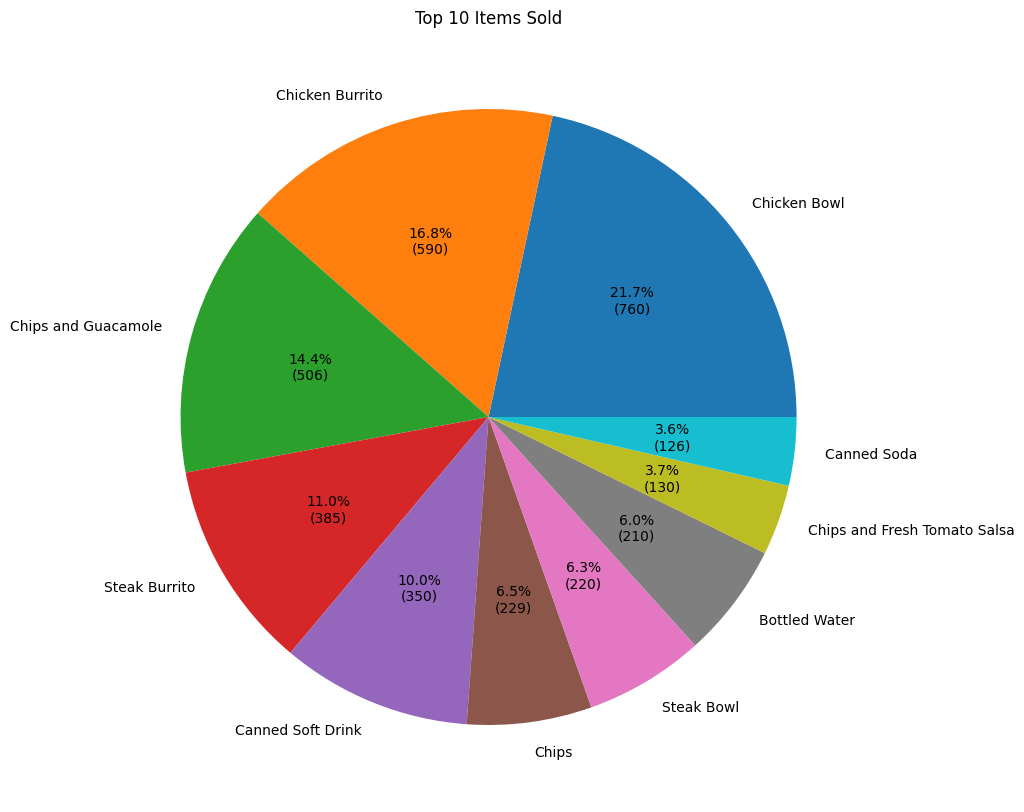

In [29]:
item_totals = chipotle_data.groupby('item_name')['quantity'].sum()
top10 = item_totals.sort_values(ascending = False).head(10)
top10.plot.pie(
    y = 'quantity',
    autopct=lambda p: f'{p:.1f}%\n({int(p/100.*top10.sum())})',
    figsize = (10, 10),
    title = "Top 10 Items Sold",
    ylabel = ""
)

Text(0.5, 0, 'items')

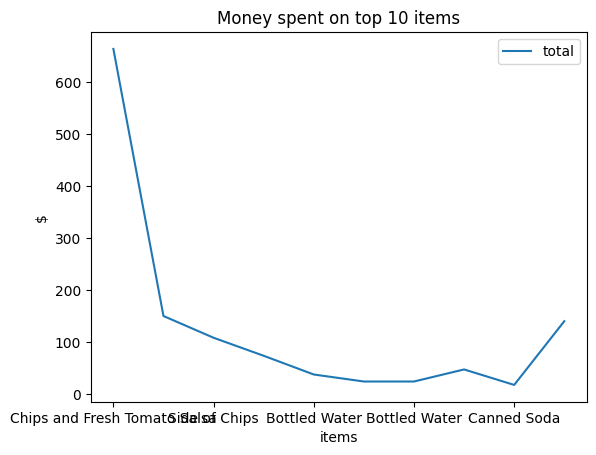

In [26]:
top10["total"] = (top10['quantity'] * top10['item_price'])
top10.plot.line(x = 'item_name', y = 'total')
plt.title('Money spent on top 10 items')
plt.ylabel('$')
plt.xlabel('items')

Average price for each item sold at chipotle: 

In [27]:
# print(chipotle_data.groupby("item_price").quantity.sum().mean())
ex = chipotle_data["item_price"].mean()
print(ex)

7.464335785374297
